# Treinamento & Validação
Esse **Jupyter Notebook** tem como objetivo treinar modelos de *Machine Learning* com uma ou mais *features* e verificar quão bem esses modelos estão aprendendo com base na métrica de validação - [Erro Médio Absoluto](https://en.wikipedia.org/wiki/Mean_absolute_error).

---

# Classe "Training"
Como um dos requisitos da **GRIA** para o desafio era que os códigos fossem reaproveitados e documentados. Para satisfazer esses requisitos vamos criar a classe **Training** que vai ser responsável pelo processo de treinar nossos dados em vários modelos diferentes e metrifica-los.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from math import floor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold


class Training:

  def split_data(self, x, y):
    start_time = datetime.now()
    x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=42)
    end_time = datetime.now()
    print('Method runtime: {}'.format(end_time - start_time))
    return x_train, x_valid, y_train, y_valid


  def linear_regression(self, x_train, y_train, x_valid_test, predict=False, model_name=None):
    start_time = datetime.now()
    model = LinearRegression() # Instance.
    model.fit(x_train, y_train) # Training.
    # Save model process.
    if model_name is not None:
      joblib.dump(
        value=model,
        filename=f"../resources/load/{model_name}.pkl"
      )
      print("Model saved!")
    # Predict process.
    if predict is True:
      salaries_predicted = pd.DataFrame(model.predict(x_valid_test), columns=["SalaryNormalized"])
      end_time = datetime.now()
      print('Method runtime: {}'.format(end_time - start_time))
      return salaries_predicted


  def ridge_regression(self, x_train, y_train, x_valid_test, predict=False, model_name=None):
    start_time = datetime.now()
    model = Ridge(alpha=1.0) # Alpha = Learning Rate.
    model.fit(x_train, y_train) # Training.
    # Save model process.
    if model_name is not None:
      joblib.dump(
        value=model,
        filename=f"../resources/load/{model_name}.pkl"
      )
      print("Model saved!")
    # Predict process.
    if predict is True:
      salaries_predicted = pd.DataFrame(model.predict(x_valid_test), columns=["SalaryNormalized"])
      end_time = datetime.now()
      print('Method runtime: {}'.format(end_time - start_time))
      return salaries_predicted


  def lasso_regression(self, x_train, y_train, x_valid_test, predict=False, model_name=None):
    start_time = datetime.now()
    model = Lasso(alpha=10, max_iter=1000, tol=0.1)
    model.fit(x_train, y_train) # Training.
    # Save model process.
    if model_name is not None:
      joblib.dump(
        value=model,
        filename=f"../resources/load/{model_name}.pkl"
      )
      print("Model saved!")
    # Predict process.
    if predict is True:
      salaries_predicted = pd.DataFrame(model.predict(x_valid_test), columns=["SalaryNormalized"])
      end_time = datetime.now()
      print('Method runtime: {}'.format(end_time - start_time))
      return salaries_predicted


  def elasticnet_regression(self, x_train, y_train, x_valid_test, predict=False, model_name=None):
    start_time = datetime.now()
    model = ElasticNet(alpha=1, l1_ratio=0.5, tol=0.3)
    model.fit(x_train, y_train) # Training.
    # Save model process.
    if model_name is not None:
      joblib.dump(
        value=model,
        filename=f"../resources/load/{model_name}.pkl"
      )
      print("Model saved!")
    # Predict process.
    if predict is True:
      end_time = datetime.now()
      print('Method runtime: {}'.format(end_time - start_time))
      salaries_predicted = pd.DataFrame(model.predict(x_valid_test), columns=["SalaryNormalized"])
      return salaries_predicted


  def random_forest_regressor(self, x_train, y_train, x_valid_test, predict=False, model_name=None):
    start_time = datetime.now()
    model = RandomForestRegressor(n_jobs=-1) # Instance.
    model.fit(x_train, np.ravel(y_train)) # Training.
    # Save model process.
    if model_name is not None:
      joblib.dump(
        value=model,
        filename=f"../resources/load/{model_name}.pkl"
      )
      print("Model saved!")
    # Predict process.
    if predict is True:
      salaries_predicted = pd.DataFrame(model.predict(x_valid_test), columns=["SalaryNormalized"])
      end_time = datetime.now()
      print('Method runtime: {}'.format(end_time - start_time))
      return salaries_predicted


  def get_mae_scores(self, x, y):
    start_time = datetime.now()
    # KFold instance -  # shuffle=True, Shuffle (embaralhar) the data.
    kfold = KFold(
      n_splits=10,
      shuffle=True
    )

    # Models instances.
    randomForestRegressor = RandomForestRegressor(n_jobs=-1)
    linearRegression      = LinearRegression()
    elasticNet            = ElasticNet()
    ridge                 = Ridge()
    lasso                 = Lasso()

    # Apply cross-validation with KFold for all models.
    randomForestRegressor_result = abs(cross_val_score(randomForestRegressor, x, y, cv = kfold, scoring='neg_mean_absolute_error'))
    linearRegression_result      = abs(cross_val_score(linearRegression, x, y, cv = kfold, scoring='neg_mean_absolute_error'))
    elasticNet_result            = abs(cross_val_score(elasticNet, x, y, cv = kfold, scoring='neg_mean_absolute_error'))
    ridge_result                 = abs(cross_val_score(ridge, x, y, cv = kfold, scoring='neg_mean_absolute_error'))
    lasso_result                 = abs(cross_val_score(lasso, x, y, cv = kfold, scoring='neg_mean_absolute_error'))

    # Create a dictionary to store the Models.
    dic_models = {
      "randomForestRegressor": randomForestRegressor_result.mean(),
      "LinearRegression": linearRegression_result.mean(),
      "ElasticNet": elasticNet_result.mean(),
      "Ridge": ridge_result.mean(),
      "Lasso": lasso_result.mean()
    }
    bestModel = min(dic_models, key=dic_models.get) # Select the best model.

    print("MAE for Random Forest Regressor: {0}\nMAE for Linear Regression: {1}\nMAE for Ridge (L2) Regression: {2}\nMAE for Lasso (L1) Regression: {3}\nMAE for Elastic Net (L2 + L1) Regression: {4}".format(randomForestRegressor_result.mean(), linearRegression_result.mean(), elasticNet_result.mean(), ridge_result.mean(), lasso_result.mean()))
    print("The best model is {0} with MAE value: {1}".format(bestModel, dic_models[bestModel]))
    end_time = datetime.now()
    print('Method runtime: {}'.format(end_time - start_time))


  def create_train_sizes(self, x, cv):
    train_sizes = [1] # Start train_size with 1 element.
    count_while = 1 # While control.
    div_train_sizes = floor(x.shape[0]/2) #
    while count_while < cv:
      train_sizes.insert(1, div_train_sizes) # Always add train_size in to index=1, index 0 always is 1.
      div_train_sizes = floor(div_train_sizes/2) # Set new value to div_train_sizes
      count_while += 1 # While increment.
    return train_sizes


  def create_learning_curves(self, x=None, y=None, estimator=None, cv=5, save=None):
    start_time = datetime.now()
    # Check X, y variables.
    if x is None:
      return print("Please, enter X variables!")
    elif y is None:
      return print("Please, enter target (Y) variable!")
    
    # Check estimator before create Learning Curves.
    if estimator is None:
      return print("Please, enter your estimator!")
    else:
      try:
        estimator = estimator()
      except NameError:
        print("Invalid estimator!")
      else:
        # Get train sizes.
        train_sizes = self.create_train_sizes(x, cv)
        # Get Learning Curve statistics.
        train_sizes, train_scores, validation_scores = learning_curve(
          estimator = estimator,
          X = x,
          y = y,
          train_sizes = train_sizes,
          cv = cv,
          scoring = 'neg_mean_squared_error',
          shuffle=True
        )
        # Get mean statistics.
        train_scores_mean = -train_scores.mean(axis = 1)
        validation_scores_mean = -validation_scores.mean(axis = 1)
        # Display statistics.
        print("train_sizes: ", train_sizes)
        print('\n', '-' * 70) # Estamos multiplicando o caractere '-' por 70, ou seja, uma linha tracejada.   
        print('Training scores:\n\n', train_scores)
        print('\nValidation scores:\n\n', validation_scores)
        print('\n', '-' * 70)  
        print('\nMean training scores:\n', pd.Series(train_scores_mean, index = train_sizes))
        print('\nMean validation scores:\n',pd.Series(validation_scores_mean, index = train_sizes))
        # Create a plot.
        if save is None:
          plt.figure(figsize=(10, 7))
          plt.style.use('seaborn')
          plt.plot(train_sizes, train_scores_mean, marker='o', label = 'Training error')
          plt.plot(train_sizes, validation_scores_mean, marker='o', label = 'Validation error')
          plt.ylabel('MAE', fontsize = 14)
          plt.xlabel('Training set size', fontsize = 14)
          plt.title('Learning curves for a ' + str(estimator).split('(')[0] + ' model', fontsize = 18, y = 1.03)
          plt.legend()
          plt.show()
          end_time = datetime.now()
          print('Method runtime: {}'.format(end_time - start_time))
        else:
          plt.figure(figsize=(10, 7))
          plt.style.use('seaborn')
          plt.plot(train_sizes, train_scores_mean, marker='o', label = 'Training error')
          plt.plot(train_sizes, validation_scores_mean, marker='o', label = 'Validation error')
          plt.ylabel('MAE', fontsize = 14)
          plt.xlabel('Training set size', fontsize = 14)
          plt.title('Learning curves for a ' + str(estimator).split('(')[0] + ' model', fontsize = 18, y = 1.03)
          plt.legend()
          plt.savefig(f"../resources/load/{save}.png", format='png')
          plt.show()
          end_time = datetime.now()
          print('Method runtime: {}'.format(end_time - start_time))


Agora vamos criar uma instância da classe **Training**:

In [2]:
# Training instance.
training = Training()

---

# 01 - Preparando o Ambiente e importando módulos externos
Nessa etapa vamos preparar os dados e o ambiente (jupyter notebook) e importar o módulo externo **preprocessing.py**.

## 01 - Baixando as Bibliotecas necessárias
Inicialmente vamos baixar as bibliotecas necessárias para nossa análise (Eu já tenho todas baixadas no meu ambiente virtual, mas vocês podem remover o comentário e baixar para sua máquina local ou Ambiente Virtual).

In [3]:
#!pip install --upgrade -r ../requirements.txt --user

## 01.2 - Importando o módulo "Preprocessing"
Nós também vamos utilizar o módulo **"Preprocessing"** que foi criado na etapa de *Pré-Processamento*.

In [4]:
%run "../src/preprocessing.py"

In [5]:
preprocessing = Preprocessing()

---

# 02 - Treinando & Validando os Loads
> Na parte de **Treinamento & Validação** nós vamos utilizar as colunas (features) já Pré-Processadas em cada **Load** para treinar vários modelos de Regressão e tentar encontrar o que nós dar o melhor resultado (performance) de acordo com os dados passados.

---

## 02.1 - Treinando & Validando o Load-v1
Bem, no **load-v1** foi passado para a etapa de **treinamento & validação** a coluna (feature) **"Title"**. Ou seja, nós vamos ter as seguintes variáveis (features) para os nossos modelos:

 - **Variáveis Independente:**
   - Title *(com CountVectorizer):*
     - stop_words="english"
     - max_df=0.60 (Ignores terms that appear in MORE than 60% of documents)
     - min_df=0.05 (Ignores terms that appear in LESS than 5% of documents)
 - **Variáveis Dependente:**
   - SalaryNormalized (normalizada pelo a Adzuna)

**NOTE:**  
Esse vai ser o nosso **baseline model**.

**Pegando a variável dependente (target=y):**

In [6]:
# Extract training set.
preprocessing.extract_7z_data("../datasets/Train_rev1.7z")

File extracted!
Method runtime: 0:00:12.307387


In [7]:
df_training = preprocessing.get_training_data()

Training data ready!
Method runtime: 0:00:13.052837


In [8]:
y = df_training["SalaryNormalized"]

**Pegando a variável Independente (X):**

In [9]:
import scipy.sparse
df_title_vectorized = scipy.sparse.load_npz('../resources/processed_features/df_title_train_vectorized.npz')

In [10]:
x = df_title_vectorized

**Dividindo os dados em *dados de treino* e *dados de validação*:**

In [11]:
x_train, x_valid, y_train, y_valid = training.split_data(x, y)

Method runtime: 0:00:00.253133


**Testando a Métrica de validação MAE com Validação-Cruzada K-Fold**  
Agora vamos testar nossa **Métrica de Validação MAE (Mean Absolute Error)** para cada algoritmo, porém, utilizando uma **Validação-Cruzada** com **K-Fold**.

In [12]:
training.get_mae_scores(x_train, y_train)

MAE for Random Forest Regressor: 12071.294116810092
MAE for Linear Regression: 12149.35217790546
MAE for Ridge (L2) Regression: 13169.351870824506
MAE for Lasso (L1) Regression: 12149.290600126962
MAE for Elastic Net (L2 + L1) Regression: 12149.684442936528
The best model is randomForestRegressor with MAE value: 12071.294116810092
Method runtime: 0:02:05.686011


**NOTE:**  
Bem, para esse conjunto de dados o modelo que teve a melhor performance (MAE) foi o **Random Forest Regressor**.

**NOTE:**  
Agora vamos fazer algumas predições com esse modelo, porém, nos dados de teste.

**Pegando a variável independente (X) de teste:**

In [13]:
import scipy.sparse
df_title_test_vectorized = scipy.sparse.load_npz('../resources/processed_features/df_title_test_vectorized.npz')

**Fazendo previsões para os dados de teste:**  
Para fazer previsões com os dados de teste nós devemos passar:
 - x_train;
 - y_train;
 - x_test (ou seja, feature que nós pré-processamos).

In [14]:
salaries_predicted = training.random_forest_regressor(x_train, y_train, df_title_test_vectorized, predict=True)

Method runtime: 0:00:12.314478


In [15]:
salaries_predicted

,SalaryNormalized
0,43291.384577
1,34134.330581
2,37131.749843
3,37131.749843
4,31017.228032
...,...
122458,31017.228032
122459,41907.787436
122460,31017.228032
122461,18568.202868


**Criando Learning Curves (ou Curvas de Aprendizado):**  
Ok, nós já escolhemos o modelo que teve a melhor performance para a métrica **MAE**, fizemos previsões com os dados de teste para esse modelo. Agora vem a ***pergunta chave***:

> Qual a Taxa de erro para os dados de treino e os dados de validação para esse modelo?

Para isso nós vamos utilizar o método **create_learning_curves()** que nós criamos na classe **Training**, respondável por retornar estatísticas de erros de um modelo X (RandomForestRegressor no nosso caso).

Vamos passar como argumento para o método **create_learning_curves()**:
 - x_train;
 - y_train;
 - Estimator:
   - O modelo que nós escolhemos.
 - save (opcional):
   - Nome para o plot() criado, esse nome vai ser usado para salvar a imagem em: *resources/load*

train_sizes:  [    1   334   669  1338  2677  5354 10708 21417 42834 85668]

 ----------------------------------------------------------------------
Training scores:

 [[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-2.02141557e+08 -2.58067260e+08 -3.71429131e+08 -2.21569480e+08
  -2.88139770e+08 -2.04571174e+08 -2.73405540e+08 -2.72843834e+08
  -2.40163104e+08 -2.77735751e+08]
 [-2.20892935e+08 -2.56842916e+08 -3.13173173e+08 -2.40844934e+08
  -2.62499575e+08 -2.33321683e+08 -2.94117972e+08 -2.63901462e+08
  -2.50235685e+08 -2.59817911e+08]
 [-2.31458838e+08 -2.68839070e+08 -3.18279968e+08 -2.43435315e+08
  -2.68239754e+08 -2.41936619e+08 -2.87777815e+08 -2.51558308e+08
  -2.55479015e+08 -2.62963481e+08]
 [-2.51573512e+08 -2.78694917e+08 -2.79447148e+08 -2.65699410e+08
  -2.68585459e+08 -2.58352128e+08 -2.90621466e+08 -2.68343817e+08
  -2.66847463e+08 -2.77883071e+0

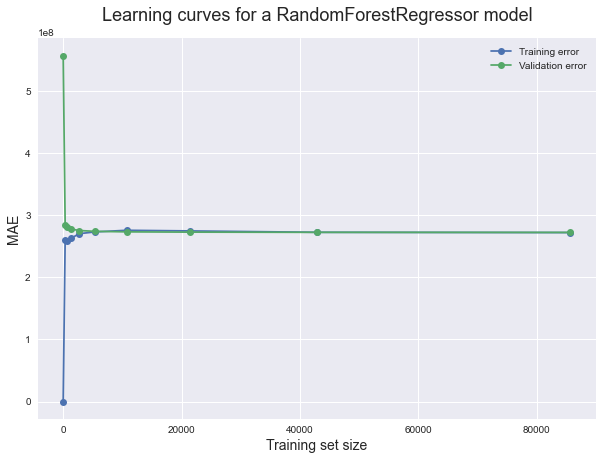

Method runtime: 0:02:20.303469


In [16]:
training.create_learning_curves(x=x_train, y=y_train, estimator=RandomForestRegressor, cv=10, save="learning-curve-load-01")

Olhando para as estatísticas acima, nós temos o seguinte:
 - **train_sizes: O tamanho do nosso "train_sizes" vai depender do tamanho do Cross-Validaton. Como eu passei cv=10 o nosso "train_sizes" vai ser em 10 conjuntos diferentes:**
   - train_sizes:  [    1   334   669  1338  2677  5354 10708 21417 42834 85668]
   - A lógica de criação dos conjuntos foi a seguinte:
     - Inicia com 1 ... até ... o número de instâncias dividido por 2 e vai dividindo até chegar em cv-1.
 - **training scores: Nos erros de treino nós tivemos a seguinte situação:**
   - Quanto tivemos apenas uma instância o erro foi claro (claro, o algoritmo de ajustou perfeitamente).
   - O erro máximo no conjunto de treinamento foi de **2.72**.
 - **validation scores: Nos erros de treino nós tivemos a seguinte situação:**
   - Obviamente, quando tinhamos apenas uma instância nos dados de treino o erro de validação foi o maior 4.1, visto que o Algoritmo não generalizou (aprendeu) suficiente.
   - O erro mínimo foi 2.72 com 85.668 instâncias.
 - **Observações gerais:**
   - A partir de 20.000 instâncias os erros convergem e ficam sempre entre **2.69** e **2.72**:
     - Ou seja, não adianta adicionar mais instâncias a partir desse ponto que o algoritmo provavelmente não vai performar melhor.
     - Uma abordagem para melhorar (tentar resolver) esse problema será aumentar a complexidade do modelo (por exemplo, adicionando ou melhorando alguma feature).
     - Outra observação importante é que temos uma baixa variância, pois o **gap (lacuna)** entre os dois erros é muito pequeno:
       - Geralmente, quanto mais estreita a lacuna (gap), menor a variância;
       - O oposto também é verdadeiro: quanto maior a diferença da lacuna (gap), maior a variância

**Salvando o load-v1:**  
Por fim, agora vamos salvar o nosso **load-v1** que vai ser:
 - O modelo que teve melhor performance (Random Forest Regresso);
 - As predições desse modelo para os dados de teste.

**NOTE:**  
Para salvar o modelo, para cada implementações eu criei um "mecanismo", onde só é passar o nome *(model_name)* do modelo que ele já vai salvar automaticamente. Lembrando, também que não vamos passar o argumento **"predict=True"** e como por default ele é *False*, nenhuma predição será feitas.

In [17]:
training.random_forest_regressor(x_train, y_train, df_title_test_vectorized, model_name="model-v1")

Model saved!


In [18]:
preprocessing.save_to_csv(df=salaries_predicted, df_name="test-predict-load-v1")

DataFrame saved!


---

# Resumos

 - **No *Load-v1* nós tinhamos as seguintes situações:**
   - Variáveis (features):
     - Independentes:
       - Title *(com CountVectorizer):*
         - stop_words="english"
         - max_df=0.60 (Ignores terms that appear in MORE than 60% of documents)
         - min_df=0.05 (Ignores terms that appear in LESS than 5% of documents)
     - Dependente:
       - SalaryNormalized (normalizada pelo a Adzuna)
   - *Como Métrica de Avaliação (MAE) tivemos os seguintes resultados:*
     - MAE for Random Forest Regressor: 12071.294116810092
     - MAE for Linear Regression: 12149.35217790546
     - MAE for Ridge (L2) Regression: 13169.351870824506
     - MAE for Lasso (L1) Regression: 12149.290600126962
     - MAE for Elastic Net (L2 + L1) Regression: 12149.684442936528
     - The best model is randomForestRegressor with MAE value: 12071.294116810092
   - *Learning Curves:*
     - *training scores: Nos erros de treino nós tivemos a seguinte situação:*
       - Quanto tivemos apenas uma instância o erro foi claro (claro, o algoritmo de ajustou perfeitamente).
       - O erro máximo no conjunto de treinamento foi de 2.72.
     - *validation scores: Nos erros de treino nós tivemos a seguinte situação:*
       - Obviamente, quando tinhamos apenas uma instância nos dados de treino o erro de validação foi 5.57. Isso, acontece porque o Algoritmo não generalizou (aprendeu) suficiente.
       - O erro mínimo foi 2.72 com 85.668 instâncias.
     - *Observações gerais:*
       - A partir de 2.000 instâncias os erros convergem e ficam sempre entre 2.70 e 2.75:
         - Ou seja, não adianta adicionar mais instâncias a partir desse ponto que o algoritmo provavelmente não vai performar melhor.
         - Uma abordagem para melhorar (tentar resolver) esse problema será aumentar a complexidade do modelo (por exemplo, adicionando ou melhorando alguma feature).
         - Outra observação importante é que temos uma baixa variância, pois o gap (lacuna) entre os dois erros é muito pequeno:
           - Geralmente, quanto mais estreita a lacuna (gap), menor a variância;
           - O oposto também é verdadeiro: quanto maior a diferença da lacuna (gap), maior a variância

**Rodrigo Leite -** *drigols*